In [156]:
# imports

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input
import random
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage import uniform_filter
from sklearn.decomposition import PCA





# **3. Load the mnist dataset**
***

In [157]:
# define random seed
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


# **4. Present simple statistics of this dataset:**
***

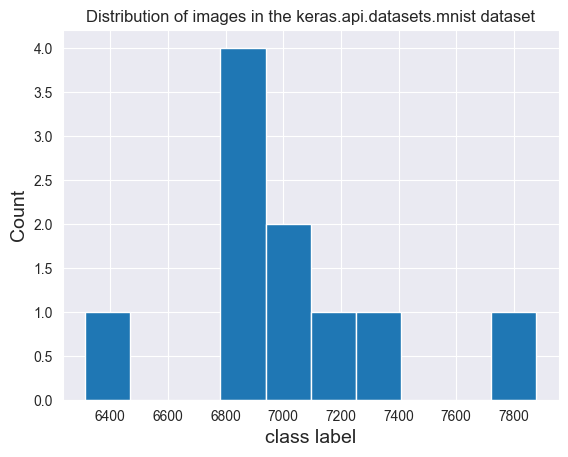

,Number of images,Class distribution,Average number of white pixels,Standard deviation of white pixels,Common non-white pixels per class
0,70000,6903,7.240910,24.266312,345
1,70000,7877,3.613685,10.816985,490
2,70000,6990,5.944492,20.322924,300
3,70000,7141,5.953368,20.555728,326
4,70000,6824,4.847743,16.463461,316
5,70000,6313,5.359575,18.257221,310
6,70000,6876,5.504945,18.786060,356
7,70000,7293,4.539284,15.439864,332
8,70000,6825,5.555458,19.388457,350
9,70000,6958,4.716010,15.829870,359


In [158]:
def show_statistics(dataset):
    """
    Shows some statistics about the dataset
    :param dataset: 
    :return: 
    """
    # load the dataset
    (input_train, labels_train),(input_test,labels_test) = dataset.load_data()
     
     # combine training and test
    images = np.concatenate((input_train, input_test), axis=0)
    labels = np.concatenate((labels_train, labels_test), axis=0)
    
    # number of images
    num_images = len(images)
    
    # show the distribution of the images
    class_distribution = np.bincount(labels)
    plt.title(f'Distribution of images in the {dataset.__name__} dataset')
    plt.xlabel('class label', fontsize=14)

    plt.ylabel('Count', fontsize=14)
    plt.hist(class_distribution)
    plt.show()
    
    # average number of white pixels(255) and their std per class
    average_white_pixels = []
    std_white_pixels = []
    common_non_white_pixels = []
    
    for digit in range(10): # 10 digits 0-9:
        digit_images = images[labels == digit]
        white_pixels_count = np.sum(digit_images == 255, axis=(1, 2)) # columns of pixels, with consideration to RGB matrix
        average_white_pixels.append(np.mean(white_pixels_count))
        std_white_pixels.append(np.std(white_pixels_count))
        
        #calculate common non-white pixels
        common_non_white = np.all(digit_images!= 255, axis =0).sum()    # if any pixel is not 255, he is not white sum all the areas of that along the images
        common_non_white_pixels.append(common_non_white)
    # Compile results
    statistics = {
        "Number of images": num_images,
        "Class distribution": class_distribution,
        "Average number of white pixels": average_white_pixels,
        "Standard deviation of white pixels": std_white_pixels,
        "Common non-white pixels per class": common_non_white_pixels
    }
    
    df_statistics = pd.DataFrame(statistics)
    
    display(df_statistics)     
show_statistics(mnist) 


    

# **5.Apply a simple neural network**
***


In [159]:
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [160]:


# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Build the neural network model
model = Sequential([
    Input(shape=(28, 28)),  # Input layer specifying the shape of input data
    Flatten(),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(10)  # Output layer with 10 units (one for each digit class)
])

# Compile the model with the desired metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
results = model.evaluate(x_test, y_test, verbose=2)

# Calculate Precision, Recall, and F1 Score manually
y_pred = tf.argmax(model.predict(x_test), axis=1)

# Evaluate the model on test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall (Sensitivity) score:", recall)
print("F1 score:", f1)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8595 - loss: 0.4914
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9537 - loss: 0.1589
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9649 - loss: 0.1161
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9722 - loss: 0.0897
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9760 - loss: 0.0768
313/313 - 0s - 2ms/step - accuracy: 0.9764 - loss: 0.0790
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy score: 0.9764
Precision score: 0.9765246494307892
Recall (Sensitivity) score: 0.9764
F1 score: 0.9764080985780682


# **6.confusion matrix**
***

[[ 967    0    1    0    1    0    5    1    4    1]
 [   0 1117    4    1    0    1    3    3    6    0]
 [   3    2 1000    2    2    0    4   13    6    0]
 [   0    0    2  997    0    1    0    4    2    4]
 [   2    0    3    1  950    0    4    5    2   15]
 [   4    0    0   12    2  857    3    3    7    4]
 [   2    3    0    1    4    3  943    0    2    0]
 [   1    0   10    5    0    0    0 1006    1    5]
 [   5    0    2    5    4    1    2    8  943    4]
 [   4    2    0    5    6    1    0    6    1  984]]


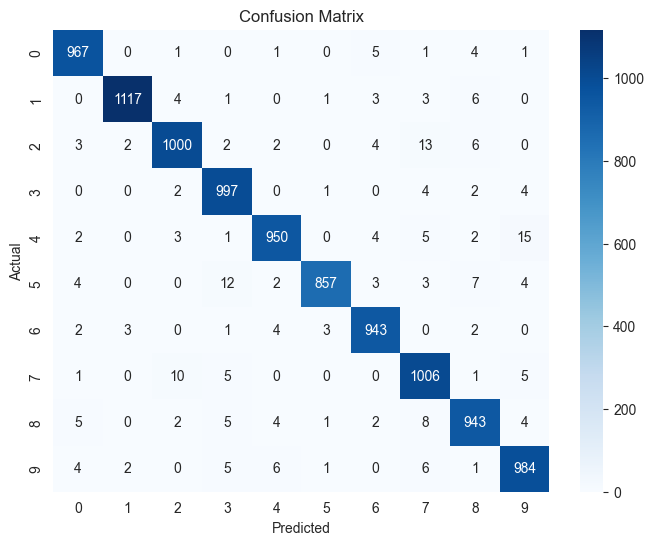

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [161]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define labels for the confusion matrix
labels = [str(i) for i in range(10)]

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed analysis
print(classification_report(y_test, y_pred, target_names=labels))



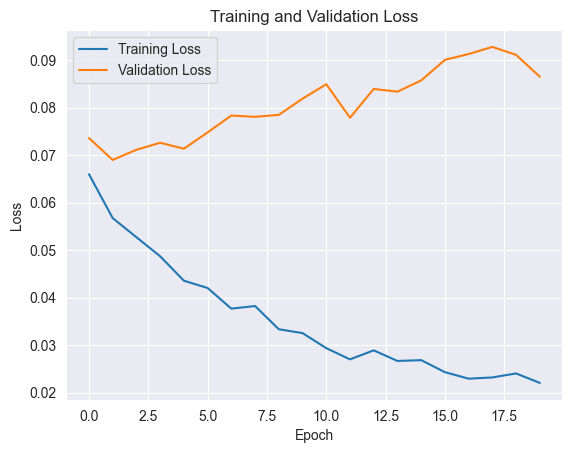

Optimal number of epochs: 2


In [162]:

# Train the model and record history
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=0)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Optimal number of epochs: {min_val_loss_epoch}")

# **Step 8: Construct a New Dataset with Averaged Pixels**
***

In [163]:
def average_surrounding_pixels(images):
    return np.array([uniform_filter(image, size=2) for image in images])

X_train_avg = average_surrounding_pixels(x_train)
X_test_avg = average_surrounding_pixels(x_test)

In [164]:
# Build the neural network model
AVG_model = Sequential([
    Input(shape=(28, 28)),  # Input layer specifying the shape of input data
    Flatten(),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(10)  # Output layer with 10 units (one for each digit class)
])

# Compile the model with the desired metrics
AVG_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
AVG_history = AVG_model.fit(X_train_avg, y_train, epochs=20, validation_data=(X_test_avg, y_test), verbose=0)
results = AVG_model.evaluate(X_test_avg, y_test, verbose=2)

#classification
y_pred = tf.argmax(AVG_model.predict(X_test_avg), axis=1)

# Evaluate the model on test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate Precision, Recall, and F1 Score manually

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall (Sensitivity) score:", recall)
print("F1 score:", f1)

313/313 - 0s - 728us/step - accuracy: 0.9809 - loss: 0.0725
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy score: 0.9809
Precision score: 0.9810056463310469
Recall (Sensitivity) score: 0.9809
F1 score: 0.9809115697787323


[[ 973    0    1    1    0    0    2    1    2    0]
 [   0 1121    3    2    0    0    2    1    6    0]
 [   3    0 1014    2    1    0    2    4    5    1]
 [   0    0    1  999    0    2    0    3    4    1]
 [   1    0    7    1  952    0    2    3    2   14]
 [   1    0    0    7    1  868    3    2    8    2]
 [   4    1    0    1    2    3  943    0    4    0]
 [   2    2   11    3    0    0    0 1002    2    6]
 [   5    1    1    4    1    1    0    3  956    2]
 [   1    2    0    5    5    2    0    5    8  981]]


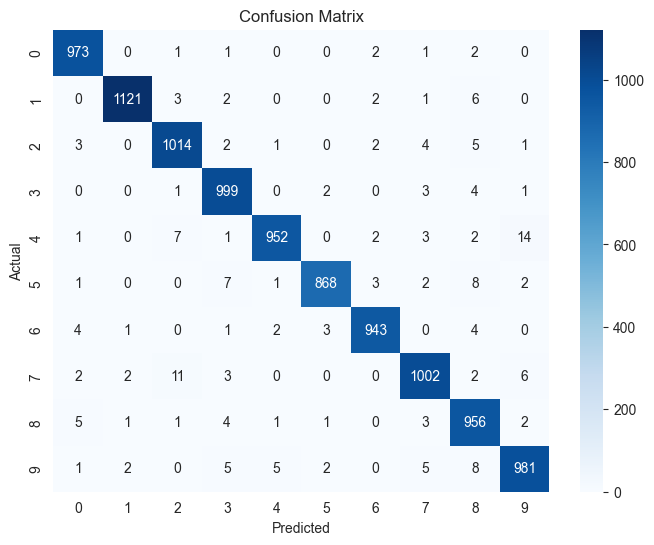

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [165]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define labels for the confusion matrix
labels = [str(i) for i in range(10)]

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed analysis
print(classification_report(y_test, y_pred, target_names=labels))


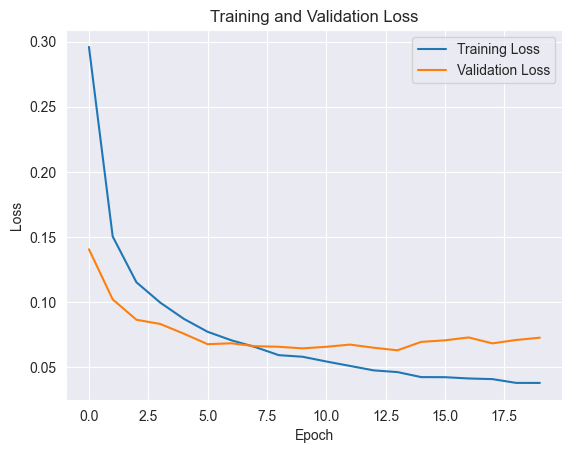

Optimal number of epochs: 14


In [166]:

# Plot training loss
plt.plot(AVG_history.history['loss'], label='Training Loss')
plt.plot(AVG_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(AVG_history.history['val_loss']) + 1
print(f"Optimal number of epochs: {min_val_loss_epoch}")


# **10a: Dimension Reduction using Principal Component Analysis (PCA)**
***


# **10b: Dimension Reduction by 3x3 Pixel Block Averaging**
***

In [167]:
# Flatten the images
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

# Define the number of components you want to keep
n_components = 50  # Example number, adjust based on your dataset
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [168]:
# Restore the reduced dimensionality images back to their original shape
x_train_pca_img = pca.inverse_transform(X_train_pca).reshape(x_train.shape[0], 28, 28)
x_test_pca_img = pca.inverse_transform(X_test_pca).reshape(x_test.shape[0], 28, 28)

# Reshape data to fit the model
x_train_pca_img = x_train_pca_img.reshape(x_train_pca_img.shape[0], 28, 28, 1)
x_test_pca_img = x_test_pca_img.reshape(x_test_pca_img.shape[0], 28, 28, 1)


In [169]:
# Build the neural network model
PCA_model = Sequential([
    Input(shape=(28, 28)),  # Input layer specifying the shape of input data
    Flatten(),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(10)  # Output layer with 10 units (one for each digit class)
])

# Compile the model with the desired metrics
PCA_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
PCA_history = PCA_model.fit(x_train_pca_img, y_train, epochs=20, validation_data=(x_test_pca_img, y_test), verbose=0)
# Evaluate the model on test data
results = PCA_model.evaluate(x_test_pca_img, y_test, verbose=2)

# Calculate Precision, Recall, and F1 Score manually
y_pred = tf.argmax(PCA_model.predict(x_test_pca_img), axis=1)

# Evaluate the model on test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall (Sensitivity) score:", recall)
print("F1 score:", f1)

313/313 - 0s - 769us/step - accuracy: 0.9799 - loss: 0.0685
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy score: 0.9799
Precision score: 0.979933611907087
Recall (Sensitivity) score: 0.9799
F1 score: 0.97990556368098


[[ 967    0    1    0    0    3    3    2    3    1]
 [   0 1122    2    1    0    0    2    2    6    0]
 [   5    1 1007    5    1    0    2    8    3    0]
 [   0    0    2  995    0    4    0    2    4    3]
 [   1    0    1    0  959    0    5    3    2   11]
 [   3    1    0    9    1  869    4    1    3    1]
 [   1    2    2    1    3    6  941    0    2    0]
 [   2    2    8    4    0    1    0 1005    1    5]
 [   6    0    1    6    1    3    2    3  948    4]
 [   0    1    0    3    6    4    1    3    5  986]]


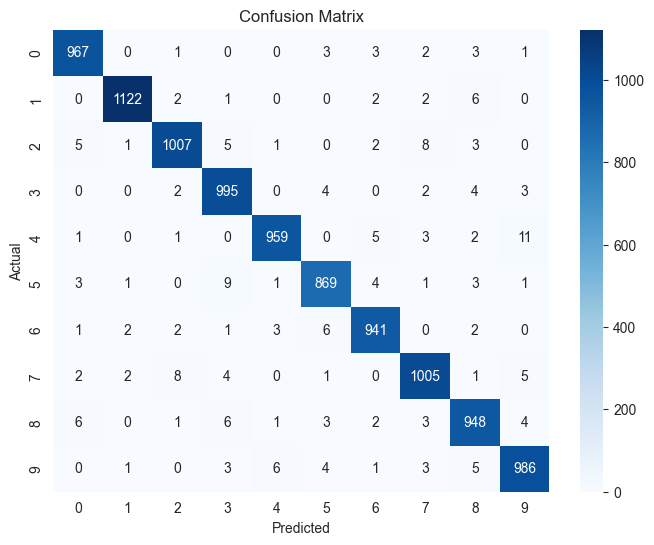

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [170]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define labels for the confusion matrix
labels = [str(i) for i in range(10)]

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed analysis
print(classification_report(y_test, y_pred, target_names=labels))


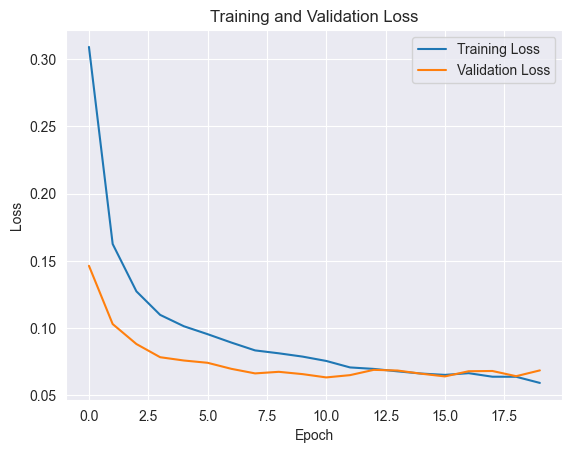

Optimal number of epochs: 11


In [171]:
# Plot training loss
plt.plot(PCA_history.history['loss'], label='Training Loss')
plt.plot(PCA_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(PCA_history.history['val_loss']) + 1
print(f"Optimal number of epochs: {min_val_loss_epoch}")


# **Create Imbalanced Dataset by Undersampling**
***

In [172]:
# Function to perform undersampling
def undersample(X, y, classes_to_undersample, target_count):
    undersampled_X, undersampled_y = [], []
    class_counts = Counter(y)

    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        if class_label in classes_to_undersample:
            sampled_indices = np.random.choice(class_indices, target_count, replace=False)
        else:
            sampled_indices = class_indices

        undersampled_X.append(X[sampled_indices])
        undersampled_y.append(y[sampled_indices])

    return np.vstack(undersampled_X), np.hstack(undersampled_y)

# Select two classes to undersample (e.g., classes 0 and 9)
classes_to_undersample = [0,9]
target_count = 500  # Number of samples for each undersampled class

X_train_undersampled, y_train_undersampled = undersample(x_train, y_train, classes_to_undersample, target_count)



print("Original class distribution:", Counter(y_train))
print("New class distribution after undersampling:", Counter(y_train_undersampled))

Original class distribution: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
New class distribution after undersampling: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 6: 5918, 8: 5851, 4: 5842, 5: 5421, 0: 500, 9: 500})


313/313 - 0s - 745us/step - accuracy: 0.9705 - loss: 0.1508
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy score: 0.9705
Precision score: 0.9710489026116882
Recall (Sensitivity) score: 0.9705
F1 score: 0.9702882648017099
[[ 950    0    4    1    2   10    5    2    6    0]
 [   0 1125    2    1    0    0    1    1    5    0]
 [   0    2 1010    7    1    0    2    8    2    0]
 [   0    0    3 1000    0    3    0    2    2    0]
 [   0    0    0    1  959    3    7    1    2    9]
 [   1    0    0   10    1  876    2    0    1    1]
 [   3    2    0    1    1    6  941    0    4    0]
 [   0    3   10    1    0    0    0 1012    1    1]
 [   0    1    2    6    3    7    0    5  950    0]
 [   4    6    1   28   22   19    0   43    4  882]]


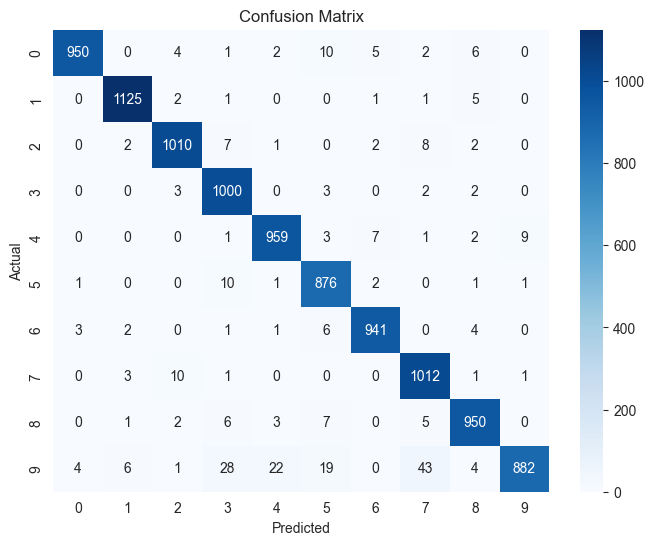

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.95      0.98      0.96       892
           6       0.98      0.98      0.98       958
           7       0.94      0.98      0.96      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.87      0.93      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



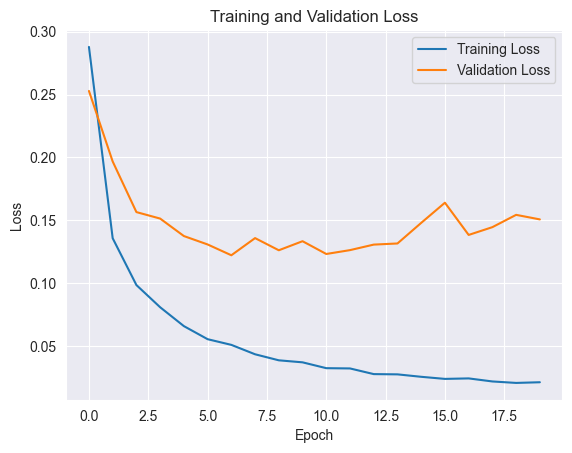

Optimal number of epochs: 7


In [173]:
# Build the neural network model
OS_model = Sequential([
    Input(shape=(28, 28)),  # Input layer specifying the shape of input data
    Flatten(),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(10)  # Output layer with 10 units (one for each digit class)
])

# Compile the model with the desired metrics
OS_model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

# Train the model
OS_history = OS_model.fit(X_train_undersampled, y_train_undersampled, epochs=20, validation_data=(x_test, y_test), verbose=0)
results = OS_model.evaluate(x_test, y_test, verbose=2)

#classification
y_pred = tf.argmax(OS_model.predict(x_test), axis=1)

# Evaluate the model on test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate Precision, Recall, and F1 Score manually

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall (Sensitivity) score:", recall)
print("F1 score:", f1)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define labels for the confusion matrix
labels = [str(i) for i in range(10)]

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed analysis
print(classification_report(y_test, y_pred, target_names=labels))

# Plot training loss
plt.plot(OS_history.history['loss'], label='Training Loss')
plt.plot(OS_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(OS_history.history['val_loss']) + 1
print(f"Optimal number of epochs: {min_val_loss_epoch}")


# **Create Imbalanced Dataset by Oversampling with Image Manipulations**
***

In [174]:
# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to perform oversampling with image augmentations
def oversample_with_augmentation(X, y, classes_to_oversample, target_count):
    oversampled_X, oversampled_y = [], []
    class_counts = Counter(y)

    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        class_images = X[class_indices]

        if class_label in classes_to_oversample:
            while len(class_images) < target_count:
                augmented_images = next(datagen.flow(class_images, batch_size=target_count - len(class_images)))
                class_images = np.vstack((class_images, augmented_images))
            class_images = class_images[:target_count]

        oversampled_X.append(class_images)
        oversampled_y.append([class_label] * len(class_images))

    return np.vstack(oversampled_X), np.hstack(oversampled_y)

# Select two classes to oversample (e.g., classes 0 and 1)
classes_to_oversample = [0,9]
target_count = 10000  # Desired number of samples for each oversampled class

X_train_oversampled, y_train_oversampled = oversample_with_augmentation(X_train_expanded, y_train, classes_to_oversample, target_count)

print("Original class distribution:", Counter(y_train))
print("New class distribution after oversampling:", Counter(y_train_oversampled))


Original class distribution: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
New class distribution after oversampling: Counter({0: 10000, 9: 10000, 1: 6742, 7: 6265, 3: 6131, 2: 5958, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [175]:
# Build the neural network model
OS2_model = Sequential([
    Input(shape=(28, 28)),  # Input layer specifying the shape of input data
    Flatten(),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(10)  # Output layer with 10 units (one for each digit class)
])

# Compile the model with the desired metrics
OS2_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
OS2_history = OS2_model.fit(X_train_oversampled, y_train_oversampled, epochs=20, validation_data=(x_test, y_test), verbose=0)
results = OS2_model.evaluate(x_test, y_test, verbose=2)

#classification
y_pred = tf.argmax(OS2_model.predict(x_test), axis=1)

# Evaluate the model on test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate Precision, Recall, and F1 Score manually

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall (Sensitivity) score:", recall)
print("F1 score:", f1)

313/313 - 0s - 659us/step - accuracy: 0.9797 - loss: 0.0819
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
Accuracy score: 0.9797
Precision score: 0.979779146406433
Recall (Sensitivity) score: 0.9797
F1 score: 0.9797101633662071


[[ 969    1    1    0    0    2    3    1    3    0]
 [   0 1127    3    0    0    0    1    0    4    0]
 [   5    2 1010    0    2    0    1    7    5    0]
 [   0    0    5  984    0    6    0    5    5    5]
 [   2    0    2    0  957    0    5    0    2   14]
 [   3    0    0    4    2  864    4    0   10    5]
 [   5    2    2    0    2    2  942    0    3    0]
 [   1    2    8    1    0    2    0 1006    3    5]
 [   2    0    1    1    2    2    1    5  956    4]
 [   2    3    0    2    7    2    0    6    5  982]]


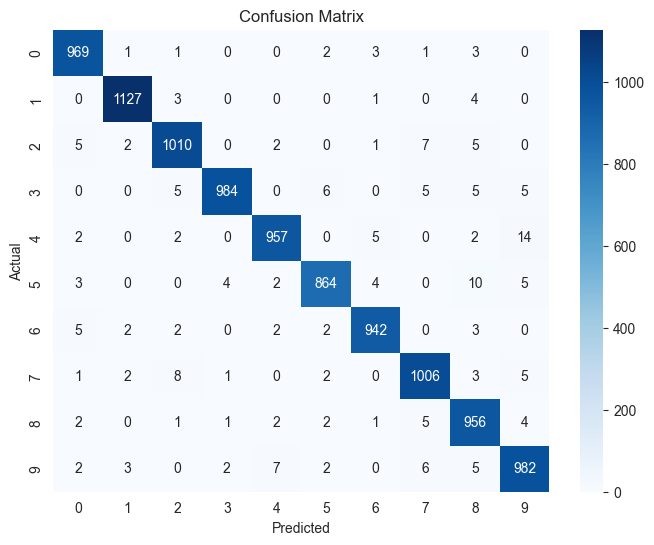

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



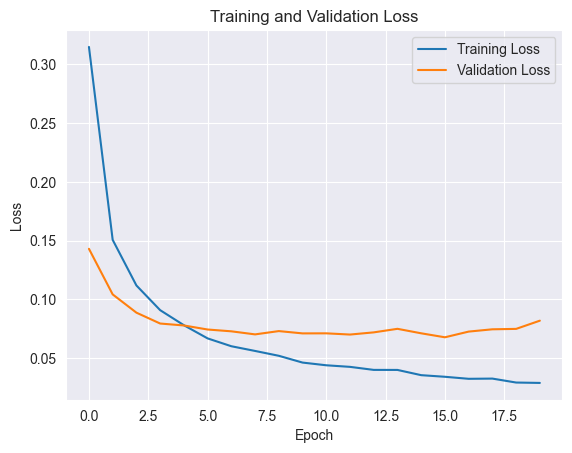

Optimal number of epochs: 16


In [176]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define labels for the confusion matrix
labels = [str(i) for i in range(10)]

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed analysis
print(classification_report(y_test, y_pred, target_names=labels))

# Plot training loss
plt.plot(OS2_history.history['loss'], label='Training Loss')
plt.plot(OS2_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(OS2_history.history['val_loss']) + 1
print(f"Optimal number of epochs: {min_val_loss_epoch}")
